In [854]:
%%html
<style>
body {
    font-family: "Times New Roman", Times, serif;
}
</style>    

<h1 align="center">NCAA and NBA Statistical Relationships Using Per Game Stats</h1>


I want to analyze every NBA player from 1980-2019 (1980 was the year the 3 point line was introduced) and look at their overall collegiate stats to see if there exists any correlation between any set of NCAA stats and NBA stats e.g. maybe NCAA free throw percentage is a good indicator for NBA three point percentage. I can't find any spreadsheets that have a player's NBA stats and collegiate stats together. I will take NBA stats from the 1980 season up to the 2018-2019 season and put them all in a spreadsheet. 

However this will cause the spreadsheet to have players that have multiple rows since they'll be present in multiple seasons. This is a problem because I want all the data for a given player to be in one row. That way the data will be cleaner and easier to interpret. To accomplish this, I will average out the NBA statistics of any player who appears multiple times in the spreadsheet so as to get their career stats in one row. 

We're going to have over 100,000 data points once I have the DataFrame the way I want it so to avoid overwhelming myself with all the potential questions, I'm going to make some questions to answer now:

1. Does there exist any correlation between a player's NCAA shooting percentages and NBA shooting percentages?
My hypothesis is there will be a correlation between at least one NCAA shooting percentage and NBA shooting percentage. This makes sense to me because it makes sense that a good shooter in the NCAA would continue being a good shooter in the NBA.
        
2. Does there exist any correlation between a player's college rebounding stats and his NBA rebounding stats?
I predict that there does exist a correlation for the same reason as number 1.
    
3. Any correlation between a player's NCAA turnovers and his NBA stats?
I believe that a player with high turnovers in the NCAA will have some positive correlation with some NBA statistic. My reasoning for this is to have a lot of turnovers in a game, you need to play a lot of minutes without your coach benching you, i.e. the pros outweigh the cons so a player with a lot of turnovers would probably be good at a lot of things as well. For example, Russell Westbrook averages a lot of turnovers but also averages a lot of points, rebounds, and assists.
    
4. Is a college player's Strength of Schedule negatively correlated to the amount of games he plays at the NBA level? 
I'm wondering if playing against weaker teams makes a prospect more attractive to NBA teams before the NBA teams realize he isn't the player they thought he was. I don't think there will actually be any correlation here, but it'd be pretty cool if there was.
    
5. Is there a correlation between a player's NBA total rebounds per game and NBA games played?
This stat doesn't really pertain to the NCAA but I thought it would be interesting none the less. I believe there would be a negative correlation, my reasoning being that a player who gets a lot of rebounds is likely to be a big man and I believe that big men would spend less time in the league.

6. Do playmaking stats in the NCAA relate to playmaking stats in the NBA?
I would be surprised if there existed no correlation between NCAA stats like Assists Per Game and NBA Assists Per Game.

In [855]:
import pandas as pd
import numpy as np

In [856]:
df = pd.concat(pd.read_excel(r'C:\Users\alper\Desktop\NBA Analytics\1998-2019 NBA Stats.xlsx', sheet_name=None), ignore_index=True, sort=True) #concatenates all 20 sheets from the xlsx file

In [857]:
df = df.sort_values(by=['Player'])
df.reset_index()

,index,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,...,PF,PTS,Player,Pos,Rk,STL,TOV,TRB,Tm,eFG%
0,13156,4.5,0.489,9.3,0.2,0.283,0.6,1.1,26,0.6,...,2.5,12.9,A.C. Green,PF,122,0.8,1.4,8.7,LAL,0.486
1,13871,3.9,0.505,7.8,0.0,0.000,0.0,1.1,24,0.5,...,2.5,11.4,A.C. Green,PF,103,1.1,1.5,8.7,LAL,0.503
2,9027,2.1,0.449,4.7,0.0,0.250,0.0,1.0,36,0.2,...,1.5,5.0,A.C. Green,PF,154,0.6,0.6,5.9,LAL,0.448
3,12782,3.0,0.507,5.9,0.1,0.200,0.7,0.9,27,0.3,...,1.4,9.1,A.C. Green,PF,135,0.7,1.2,6.3,LAL,0.486
4,10338,2.8,0.502,5.6,0.0,0.050,0.2,0.8,33,0.2,...,1.7,7.2,A.C. Green,PF,147,0.8,0.9,7.9,TOT,0.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16666,7460,1.4,0.442,3.2,0.0,NaN,0.0,0.3,31,0.5,...,2.2,3.8,Željko Rebrača,C,338,0.2,0.7,2.4,TOT,0.442
16667,7880,2.7,0.552,4.8,0.0,NaN,0.0,0.3,30,0.6,...,2.6,6.6,Željko Rebrača,C,316,0.2,1.0,3.1,DET,0.552
16668,6544,1.8,0.542,3.3,0.0,NaN,0.0,0.3,33,0.7,...,2.0,4.7,Željko Rebrača,C,344,0.2,0.8,2.2,LAC,0.542
16669,8328,2.6,0.505,5.1,0.0,NaN,0.0,0.5,29,1.0,...,2.6,6.9,Željko Rebrača,C,336,0.4,1.1,3.9,DET,0.505


In [858]:
career_games = df.loc[:, ['G', 'GS', 'Player']]
career_games_sum = career_games.groupby('Player').sum()
career_games_sum = career_games_sum.reset_index()
del career_games_sum['Player']

In [859]:
nba_df = df.groupby('Player').mean()
del nba_df['Rk'] # Means nothing
del nba_df['Age'] # average age means nothing
del nba_df['G'] # going to replace this and GS with career games instead
del nba_df['GS']
nba_df = nba_df.round(decimals = 2)
nba_df = nba_df.reset_index()

In [860]:
nba_df = nba_df.join(career_games_sum)

In [861]:
nba_df

,Player,2P,2P%,2PA,3P,3P%,3PA,AST,BLK,DRB,...,MP,ORB,PF,PTS,STL,TOV,TRB,eFG%,G,GS
0,A.C. Green,3.43,0.50,6.79,0.09,0.16,0.37,1.09,0.42,4.74,...,28.36,2.61,1.89,9.54,0.81,1.11,7.35,0.49,1278,832.0
1,A.J. Bramlett,0.50,0.19,2.60,0.00,NaN,0.00,0.00,0.00,1.30,...,7.60,1.50,1.60,1.00,0.10,0.40,2.80,0.19,8,0.0
2,A.J. English,3.95,0.45,8.85,0.05,0.14,0.40,2.15,0.15,1.20,...,20.60,0.90,1.90,9.85,0.40,1.35,2.10,0.44,151,18.0
3,A.J. Guyton,0.80,0.25,2.63,0.60,0.26,1.77,1.57,0.13,0.50,...,12.37,0.20,0.53,3.80,0.33,0.67,0.70,0.31,80,14.0
4,A.J. Hammons,0.50,0.38,1.50,0.20,0.50,0.50,0.20,0.60,1.30,...,7.40,0.40,1.00,2.20,0.00,0.50,1.60,0.46,22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Šarūnas Marčiulionis*,3.76,0.50,7.31,0.36,0.30,1.04,2.23,0.09,1.41,...,21.76,0.81,2.63,12.31,1.23,2.03,2.24,0.51,363,30.0
3056,Žan Tabak,1.95,0.49,3.95,0.00,0.00,0.00,0.62,0.53,1.98,...,13.22,1.23,2.10,4.60,0.30,1.05,3.25,0.49,247,70.0
3057,Žarko Paspalj,1.00,0.35,2.80,0.00,0.00,0.00,0.40,0.30,0.50,...,6.50,0.50,1.30,2.60,0.10,0.80,1.10,0.34,28,1.0
3058,Žarko Čabarkapa,1.43,0.46,3.13,0.17,0.27,0.63,0.57,0.17,1.47,...,10.60,0.67,1.47,4.47,0.23,0.83,2.13,0.45,150,4.0


Now I save this spreadsheet to excel so my python script can edit it there.

In [862]:
writer = pd.ExcelWriter('nba_statistics.xlsx', engine ='xlsxwriter')
nba_df.to_excel(writer, sheet_name = "Sheet 1")
writer.save()

I ran the program below to scrape the stats of all NBA players' NCAA stats and put it in a spreasheet, assuming that they played in the NCAA. If they didn't play in the NBA, the spreadsheet didn't consider them which is okay because we're only considering NCAA to NBA anyway.

In [863]:
import requests
from bs4 import BeautifulSoup
#id="div_players_per_game"

df = pd.read_excel(r'C:\Users\alper\nba_statistics.xlsx')

names = df.iloc[:,len(df.columns) - 1] # the last column in the spreadsheet contains the player names in the correct format to put in the url
names_as_list = names.tolist() # we will iterate through this list and request the url of the player

base_url = 'https://www.sports-reference.com/cbb/players/{}-1.html'

NCAA_stats = pd.DataFrame()

# test_names = ['andrew-wiggins', 'luka-doncic', 'kyrie-irving'] #used this as a test when I was writing the code

for name in names_as_list:
    request_url = base_url.format(name) # gets us link of the player
    request = requests.get(request_url) 
    soup = BeautifulSoup(request.content, 'html.parser')
    table = soup.find(name = 'div', attrs={'id':'div_players_per_game'})
    html_str = str(table)
    try:
        df = pd.read_html(html_str)[0]
        df['Player Name'] = name
    except ValueError: # if player didn't play in college
        continue
    
NCAA_stats = NCAA_stats.append(df.iloc[[len(df.index)-1]], sort=True) # len(df.index) - 1 because that's the last row which contains career stats innit

writer = pd.ExcelWriter('ncaa_stats.xlsx', engine ='xlsxwriter')
NCAA_stats.to_excel(writer, sheet_name = "Sheet 1")
writer.save()


In [864]:
ncaa_stats = pd.read_excel(r'C:\Users\alper\ncaa_stats.xlsx')
nba_stats = pd.read_excel(r'C:\Users\alper\nba_statistics.xlsx') #this file contains a column with the correctly formatted names

Now we want to append the spreadsheets together, but first we need to cut down our nba stats spreadsheet so that it contains only players that played in the NCAA.

In [865]:
nba_stats = nba_stats[nba_stats.player_url.isin(ncaa_stats.Player_Name)]
#weight_and_height_df = weight_and_height_df[weight_and_height_df.Player.isin(nba_players_df.Player)]

In [866]:
nba_stats

,Unnamed: 0,Player,2P,2P%,2PA,3P,3P%,3PA,AST,BLK,...,PF,PTS,STL,TOV,TRB,eFG%,G,GS,Player (for creating player_url),player_url
0,0,A.C. Green,3.43,0.50,6.79,0.09,0.16,0.38,1.09,0.42,...,1.89,9.54,0.81,1.11,7.35,0.49,1278,832,AC-Green,ac-green
1,1,A.J. Bramlett,0.50,0.19,2.60,0.00,NaN,0.00,0.00,0.00,...,1.60,1.00,0.10,0.40,2.80,0.19,8,0,AJ-Bramlett,aj-bramlett
2,2,A.J. English,3.95,0.45,8.85,0.05,0.14,0.40,2.15,0.15,...,1.90,9.85,0.40,1.35,2.10,0.44,151,18,AJ-English,aj-english
3,3,A.J. Guyton,0.80,0.25,2.63,0.60,0.26,1.77,1.57,0.13,...,0.53,3.80,0.33,0.67,0.70,0.31,80,14,AJ-Guyton,aj-guyton
4,4,A.J. Hammons,0.50,0.38,1.50,0.20,0.50,0.50,0.20,0.60,...,1.00,2.20,0.00,0.50,1.60,0.46,22,0,AJ-Hammons,aj-hammons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Zach LaVine,4.32,0.47,9.10,1.70,0.37,4.58,3.44,0.22,...,2.24,16.68,0.88,2.28,3.52,0.50,293,206,Zach-LaVine,zach-lavine
3041,3041,Zach Lofton,0.00,NaN,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,Zach-Lofton,zach-lofton
3042,3042,Zach Randolph,6.31,0.48,13.12,0.18,0.22,0.67,1.81,0.25,...,2.30,16.21,0.74,1.99,8.89,0.48,1116,882,Zach-Randolph,zach-randolph
3044,3044,Zendon Hamilton,0.95,0.40,2.42,0.00,NaN,0.00,0.17,0.10,...,1.25,3.35,0.25,0.67,2.57,0.40,134,15,Zendon-Hamilton,zendon-hamilton


In [867]:
ncaa_stats

,2P,2P%,2PA,3P,3P%,3PA,AST,BLK,DRB,FG,...,MP,ORB,PF,PTS,Player_Name,SOS,STL,School,TOV,TRB
0,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.3,NaN,5.3,...,35.2,NaN,2.3,14.7,ac-green,4.82,1.1,Oregon State,2.5,7.7
1,3.4,0.527,6.5,0.0,0.000,0.0,0.8,0.8,NaN,3.4,...,22.7,NaN,2.7,8.6,aj-bramlett,9.02,0.7,Arizona,1.3,6.4
2,2.7,0.489,5.5,2.8,0.374,7.5,4.6,0.5,3.7,5.5,...,34.4,0.7,2.3,17.9,aj-english,-1.10,1.3,Iona,2.9,4.3
3,3.6,0.484,7.5,2.2,0.414,5.3,3.1,0.4,NaN,5.8,...,34.0,NaN,0.9,16.4,aj-guyton,10.42,1.0,Indiana,2.3,3.4
4,4.6,0.544,8.4,0.0,0.261,0.2,0.8,2.6,4.7,4.6,...,24.3,2.4,2.5,12.1,aj-hammons,7.64,0.4,Purdue,2.1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2.1,0.494,4.3,1.3,0.375,3.5,1.8,0.2,2.1,3.4,...,24.4,0.5,2.0,9.4,zach-lavine,7.62,0.9,UCLA,1.1,2.5
2610,3.9,0.526,7.5,2.6,0.380,6.9,1.7,0.1,3.9,6.6,...,31.9,1.1,2.0,20.1,zach-lofton,NaN,1.1,New Mexico State,2.2,5.0
2611,4.2,0.590,7.1,0.0,0.000,0.0,1.0,0.7,3.6,4.2,...,19.8,3.1,1.8,10.8,zach-randolph,9.54,0.7,Michigan State,1.6,6.7
2612,5.1,0.478,10.7,0.0,0.000,0.1,0.5,0.8,NaN,5.1,...,30.9,NaN,1.6,15.9,zendon-hamilton,7.86,0.6,St. John's (NY),2.7,8.3


In [868]:
joined_stats = nba_stats.join(ncaa_stats.set_index(nba_stats.index), lsuffix = '_nba', rsuffix='_ncaa')

In [869]:
joined_stats

,Unnamed: 0,Player,2P_nba,2P%_nba,2PA_nba,3P_nba,3P%_nba,3PA_nba,AST_nba,BLK_nba,...,MP_ncaa,ORB_ncaa,PF_ncaa,PTS_ncaa,Player_Name,SOS,STL_ncaa,School,TOV_ncaa,TRB_ncaa
0,0,A.C. Green,3.43,0.50,6.79,0.09,0.16,0.38,1.09,0.42,...,35.2,NaN,2.3,14.7,ac-green,4.82,1.1,Oregon State,2.5,7.7
1,1,A.J. Bramlett,0.50,0.19,2.60,0.00,NaN,0.00,0.00,0.00,...,22.7,NaN,2.7,8.6,aj-bramlett,9.02,0.7,Arizona,1.3,6.4
2,2,A.J. English,3.95,0.45,8.85,0.05,0.14,0.40,2.15,0.15,...,34.4,0.7,2.3,17.9,aj-english,-1.10,1.3,Iona,2.9,4.3
3,3,A.J. Guyton,0.80,0.25,2.63,0.60,0.26,1.77,1.57,0.13,...,34.0,NaN,0.9,16.4,aj-guyton,10.42,1.0,Indiana,2.3,3.4
4,4,A.J. Hammons,0.50,0.38,1.50,0.20,0.50,0.50,0.20,0.60,...,24.3,2.4,2.5,12.1,aj-hammons,7.64,0.4,Purdue,2.1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Zach LaVine,4.32,0.47,9.10,1.70,0.37,4.58,3.44,0.22,...,24.4,0.5,2.0,9.4,zach-lavine,7.62,0.9,UCLA,1.1,2.5
3041,3041,Zach Lofton,0.00,NaN,0.00,0.00,0.00,1.00,0.00,0.00,...,31.9,1.1,2.0,20.1,zach-lofton,NaN,1.1,New Mexico State,2.2,5.0
3042,3042,Zach Randolph,6.31,0.48,13.12,0.18,0.22,0.67,1.81,0.25,...,19.8,3.1,1.8,10.8,zach-randolph,9.54,0.7,Michigan State,1.6,6.7
3044,3044,Zendon Hamilton,0.95,0.40,2.42,0.00,NaN,0.00,0.17,0.10,...,30.9,NaN,1.6,15.9,zendon-hamilton,7.86,0.6,St. John's (NY),2.7,8.3


In [870]:
conjoined_stats = joined_stats.iloc[:, np.r_[1:27, 29:50, 51, 52, 54, 55]] # clean it up a bit more

In [871]:
conjoined_stats

,Player,2P_nba,2P%_nba,2PA_nba,3P_nba,3P%_nba,3PA_nba,AST_nba,BLK_nba,DRB_nba,...,G_ncaa,GS_ncaa,MP_ncaa,ORB_ncaa,PF_ncaa,PTS_ncaa,SOS,STL_ncaa,TOV_ncaa,TRB_ncaa
0,A.C. Green,3.43,0.50,6.79,0.09,0.16,0.38,1.09,0.42,4.74,...,115.0,54.0,35.2,NaN,2.3,14.7,4.82,1.1,2.5,7.7
1,A.J. Bramlett,0.50,0.19,2.60,0.00,NaN,0.00,0.00,0.00,1.30,...,127.0,63.0,22.7,NaN,2.7,8.6,9.02,0.7,1.3,6.4
2,A.J. English,3.95,0.45,8.85,0.05,0.14,0.40,2.15,0.15,1.20,...,112.0,101.0,34.4,0.7,2.3,17.9,-1.10,1.3,2.9,4.3
3,A.J. Guyton,0.80,0.25,2.63,0.60,0.26,1.77,1.57,0.13,0.50,...,128.0,NaN,34.0,NaN,0.9,16.4,10.42,1.0,2.3,3.4
4,A.J. Hammons,0.50,0.38,1.50,0.20,0.50,0.50,0.20,0.60,1.30,...,132.0,95.0,24.3,2.4,2.5,12.1,7.64,0.4,2.1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,Zach LaVine,4.32,0.47,9.10,1.70,0.37,4.58,3.44,0.22,3.08,...,37.0,1.0,24.4,0.5,2.0,9.4,7.62,0.9,1.1,2.5
3041,Zach Lofton,0.00,NaN,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,33.0,31.0,31.9,1.1,2.0,20.1,NaN,1.1,2.2,5.0
3042,Zach Randolph,6.31,0.48,13.12,0.18,0.22,0.67,1.81,0.25,6.04,...,33.0,8.0,19.8,3.1,1.8,10.8,9.54,0.7,1.6,6.7
3044,Zendon Hamilton,0.95,0.40,2.42,0.00,NaN,0.00,0.17,0.10,1.60,...,114.0,NaN,30.9,NaN,1.6,15.9,7.86,0.6,2.7,8.3


I want to make a correlation matrix first just to quickly visualize the data.

In [872]:
import seaborn as sns
def corr_matrix(df, title=None):
    ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap=(sns.color_palette("PuBu", 100)), square=True)
    ax.set_xticklabels([c for c in df.columns], rotation = 45, horizontalalignment = 'right')
    ax.set_title(str(title))
    


<b> Question One: </b>Does there exist any correlation between a player's NCAA shooting percentages and NBA shooting percentages?

In [873]:
percentages = pd.DataFrame({'nba_2Pp': conjoined_stats['2P%_nba'],
                            'nba_3Pp': conjoined_stats['3P%_nba'],
                            'nba_FGp': conjoined_stats['FG%_nba'],
                            'nba_eFG': conjoined_stats['eFG%'],
                            'nba_FTp': conjoined_stats['FT%_nba'],
                            'ncaa_2Pp': conjoined_stats['2P%_ncaa'],
                            'ncaa_3Pp': conjoined_stats['3P%_ncaa'],
                            'ncaa_FGp': conjoined_stats['FG%_ncaa'],
                            'ncaa_FTp': conjoined_stats['FT%_ncaa'],
                            'NBA_AST': conjoined_stats['AST_nba']
                           })

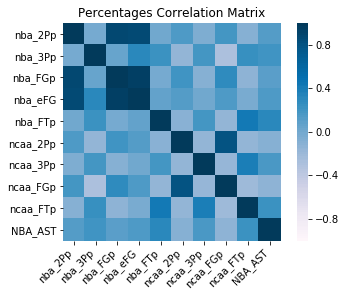

In [874]:
corr_matrix(percentages, 'Percentages Correlation Matrix')

Looking at the heat map, there doesn't seem to be any strong correlations between any of the percentages from the NCAA to the NBA. A potential explanation for this could be that defenses in the NBA are way stronger so a player being able to shoot well against college teams doesn't mean much if he can't get open against NBA defenses. 

<b>Question Two: </b>Does there exist any correlation between a player's college rebounding stats and his NBA rebounding stats? To answer this question, I'm going to convert the statistics to per minute stats to control for how much playing time a given player gets.

In [875]:
# it's annoying having to rewrite conjoined_stats
def cs(string):
    return conjoined_stats[string]

In [876]:
def pm_nba(stat):
    return cs(stat) / cs('MP_nba')
def pm_ncaa(stat):
    return cs(stat) / cs('MP_ncaa')

In [877]:
reb_stats = pd.DataFrame({'nba_orb': pm_nba('ORB_nba'),
                          'nba_drb': pm_nba('DRB_nba'),
                          'nba_trb': pm_nba('TRB_nba'),
                          'ncaa_orb': pm_ncaa('ORB_ncaa'),
                          'ncaa_drb': pm_ncaa('DRB_ncaa'),
                          'ncaa_trb': pm_ncaa('TRB_ncaa'),
                         })

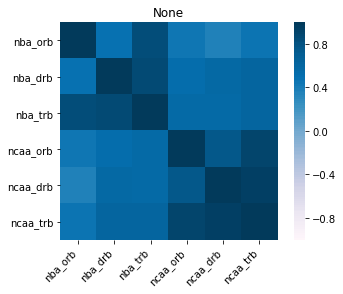

In [878]:
create_correlation_matrix(reb_stats)

It is clear that there exists some correlation between the NBA and NCAA when it comes to rebounding statistics.

<b>Question Three:</b> Any correlation between a player's NCAA turnovers and his NBA stats?

In [879]:
ncaa_to_corr = pd.DataFrame({'ncaa_topm': pm_ncaa('TOV_ncaa'),
                             'nba_topm': pm_nba('TOV_nba'),
                             'nba_orb': pm_nba('ORB_nba'),
                             'nba_drb': pm_nba('DRB_nba'),
                             'nba_trb': pm_nba('TRB_nba'),
                             'nba_apm': pm_nba('AST_nba'),
                             'nba_ppm': pm_nba('PTS_nba'),
                             'nba_fta_pm': pm_nba('FTA_nba'),
                             'games played': cs('G_nba')
                            })

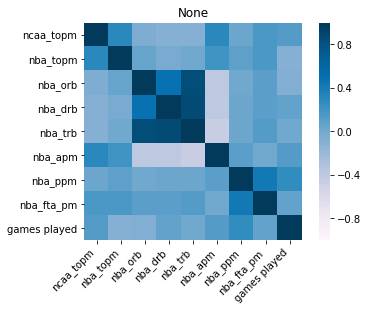

In [880]:
create_correlation_matrix(ncaa_to_corr)

As I hypothesized, it seems that there does exist a positive correlation between ncaa_topg and at least one nba stat, those stats being assists per game in the NBA and turnovers per game in the NBA. I think this would be because players that bring the ball up the court tend to have more turnovers since they hold the ball most often, and so it makes sense that these players would have the most assists as well since they bring the ball up the court because they are good at being floor generals.

<b>Question Four:</b> Is a college player's Strength of Schedule negatively correlated to the amount of games he plays at the NBA level? 

In [881]:
sos_corr = pd.DataFrame({'ncaa_sos': cs('SOS'),
                         'nba_games': cs('G_nba'),
                         'nba_started': cs('GS_nba')
                        }
                       )

In [882]:
sos_corr.dropna(inplace=True) # get rid of all rows that don't contain SOS statistic

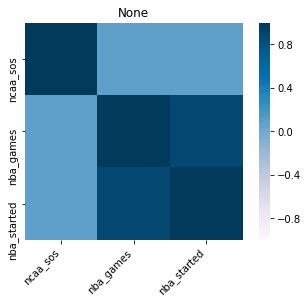

In [883]:
corr_matrix(sos_corr)

So it appears that there exists no correlation between strength of schedule and games played in the NBA. I didn't think there would be but this does have some interesting implications. One of the main concerns about Luka Doncic before he got drafted in the NBA was that he was facing lesser competition in the Euroleague than he would have in the NCAA. Besides that being a terrible argument, we have shown that there exists no correlation between a player's pre-professional competition and the length of his professional career.

<b>Question Five:</b> Is there a correlation between a player's NBA total rebounds per game and NBA games played?

In [884]:
reb_and_games = pd.DataFrame({'nba_trpm': pm_nba('TRB_nba'),
                              'nba_drpm': pm_nba('DRB_nba'),
                              'nba_orpm': pm_nba('ORB_nba'),
                              'gp_nba': cs('GS_nba')
                             })

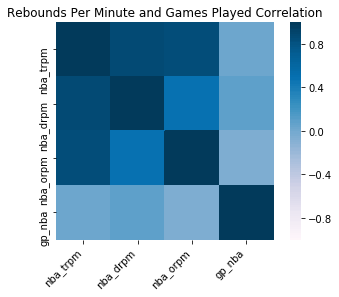

In [885]:
corr_matrix(reb_and_games, title='Rebounds Per Minute and Games Played Correlation')

<b> Question Six: </b>Do playmaking stats in the NCAA relate to playmaking stats in the NBA?

First we take all columns that could be related to a player's NBA assists per game. Then we're going to look at and get a feel for the data.

In [900]:
ast_df = pd.DataFrame({'nba_ast': cs('AST_nba'), 
                       'nba_mpg': cs('MP_nba'),
                       'nba_topg': cs('TOV_nba'),
                       'ncaa_ast': cs('AST_ncaa'),
                       'ncaa_mpg': cs('MP_ncaa'),
                       'ncaa_topg': cs('TOV_ncaa'),
                      })

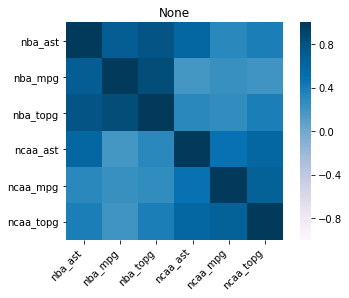

In [901]:
corr_matrix(ast_df)

Text(0.5, 1.0, 'NBA APG Histogram')

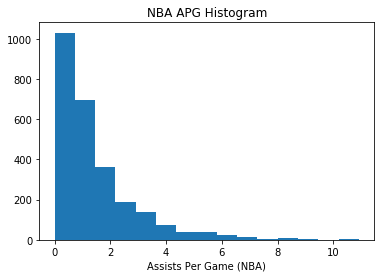

In [902]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(ast_df['nba_ast'], bins=15)
plt.xlabel('Assists Per Game (NBA)')
plt.title("NBA APG Histogram")


In [907]:
ast_df.describe()

,nba_ast,nba_mpg,nba_topg,ncaa_ast,ncaa_mpg,ncaa_topg
count,2614.000000,2614.000000,2614.000000,2505.000000,2397.000000,2243.000000
mean,1.420612,15.740490,0.992425,2.206068,28.520401,2.139634
std,1.426041,8.498004,0.649915,1.561391,5.725731,0.738862
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.470000,8.827500,0.500000,1.000000,25.500000,1.600000
50%,0.975000,14.665000,0.850000,1.800000,29.500000,2.100000
75%,1.897500,21.797500,1.330000,3.000000,32.600000,2.600000
max,10.920000,40.700000,4.050000,12.000000,39.200000,5.400000


In [925]:
def assign_ast_bins(apg):
    if apg <= 1:
        return 1
    if apg > 1 and apg <= 2:
        return 2
    if apg > 2 and apg <= 3:
        return 3
    if apg > 3 and apg <= 5:
        return 4
    if apg > 5 and apg <= 7:
        return 5
    if apg > 7:
        return 6

In [926]:
ast_df['nba_ast_bins'] = ast_df['nba_ast'].apply(assign_ast_bins)

In [927]:
ast_df

,nba_ast,nba_mpg,nba_topg,ncaa_ast,ncaa_mpg,ncaa_topg,nba_ast_bins
0,1.09,28.36,1.11,1.6,35.2,2.5,2
1,0.00,7.60,0.40,0.8,22.7,1.3,1
2,2.15,20.60,1.35,4.6,34.4,2.9,3
3,1.57,12.37,0.67,3.1,34.0,2.3,2
4,0.20,7.40,0.50,0.8,24.3,2.1,1
...,...,...,...,...,...,...,...
3040,3.44,30.34,2.28,1.8,24.4,1.1,4
3041,0.00,4.00,1.00,1.7,31.9,2.2,1
3042,1.81,30.24,1.99,1.0,19.8,1.6,2
3044,0.17,8.38,0.67,0.5,30.9,2.7,1


Text(0, 0.5, 'NBA APG')

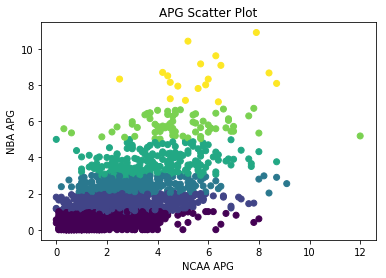

In [928]:
#plotting the scatter plot of NCAA apg vs NBA apg
plt.scatter(ast_df['ncaa_ast'], ast_df['nba_ast'], c=ast_df['nba_ast_bins'])
plt.title('APG Scatter Plot')
plt.xlabel('NCAA APG')
plt.ylabel('NBA APG')

Text(0, 0.5, 'NBA APG')

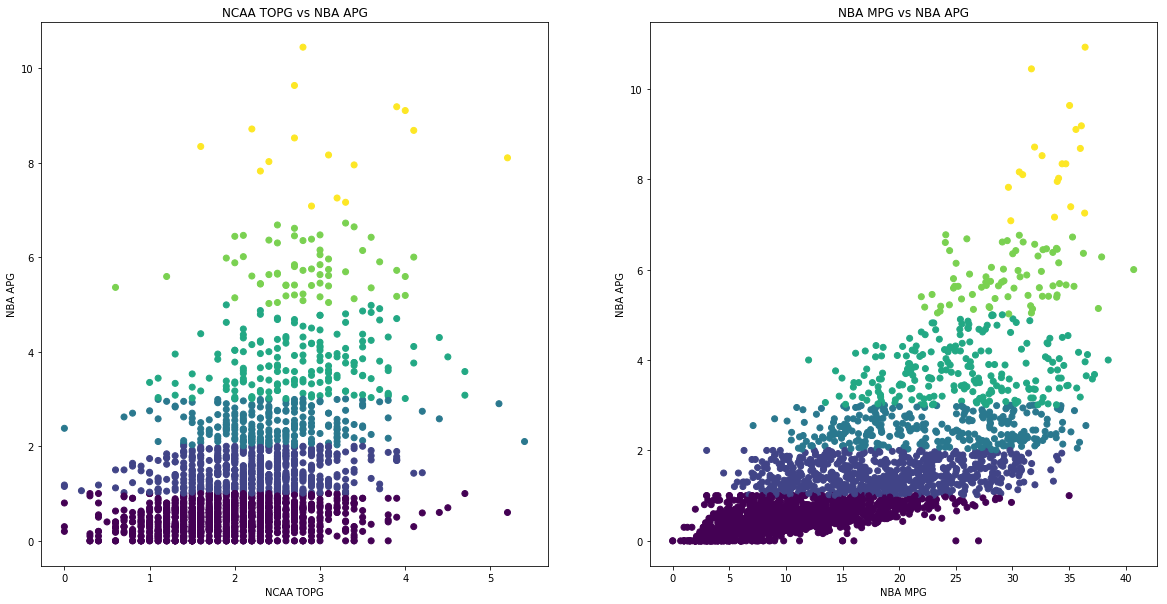

In [929]:
#let's see the scatter plots of other turnovers and then NBA minutes vs. NBA APG
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(ast_df['ncaa_topg'], ast_df['nba_ast'], c=ast_df['nba_ast_bins'])
ax1.set_title('NCAA TOPG vs NBA APG')
ax1.set_ylabel('NBA APG')
ax1.set_xlabel('NCAA TOPG')

ax2.scatter(ast_df['nba_mpg'], ast_df['nba_ast'], c=ast_df['nba_ast_bins'])
ax2.set_title('NBA MPG vs NBA APG')
ax2.set_xlabel('NBA MPG')
ax2.set_ylabel('NBA APG')

It is clear that NCAA turnovers per game and assists per game are correlated to assists per game in the NBA.